In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [39]:
data = pd.read_csv(r"E:\stud.csv")


In [40]:
data.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [41]:
data.shape

(1000, 8)

In [42]:
data.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [43]:
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [44]:
data.duplicated().sum()

np.int64(0)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [46]:
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [48]:
data.nunique().sum()

np.int64(247)

In [49]:
data.describe()


,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [50]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [51]:
print("Categories in 'Gender' Variable:    ",end=" ")
print(data['gender'].unique())
print("Categories in 'race_ethnicity' Variable:    ",end=" ")
print(data['race_ethnicity'].unique())
print("Categories in 'parental_level_of_education' Variable:    ",end=" ")
print(data['parental_level_of_education'].unique())
print("Categories in 'lunch' Variable:    ",end=" ")
print(data['lunch'].unique())
print("Categories in 'test_preparation_course' Variable:    ",end=" ")
print(data['test_preparation_course'].unique())

Categories in 'Gender' Variable:     ['female' 'male']
Categories in 'race_ethnicity' Variable:     ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' Variable:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' Variable:     ['standard' 'free/reduced']
Categories in 'test_preparation_course' Variable:     ['none' 'completed']


In [52]:
numerical_features=[feature for feature in data.columns if data[feature].dtype != 'O']
Categorical_features=[feature for feature in data.columns if data[feature].dtype == 'O']
print("Numerical Features are {}".format(numerical_features))
print("Categorical Features are {}".format(Categorical_features))

Numerical Features are ['math_score', 'reading_score', 'writing_score']
Categorical Features are ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [54]:
data.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [56]:
data['total_score']=data['math_score']+data['reading_score']+data['writing_score']
data['Average']=data['total_score']/3
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [57]:
math_full=data[data['math_score']==100]['Average'].count()
reading_full=data[data['reading_score']==100]['Average'].count()
writing_full=data[data['writing_score']==100]['Average'].count()

print("Number of Students with Full marks in Math_score : {}".format(math_full))
print("Number of Students with Full marks in reading_score : {}".format(reading_full))
print("Number of Students with Full marks in writing_score : {}".format(writing_full))

Number of Students with Full marks in Math_score : 7
Number of Students with Full marks in reading_score : 17
Number of Students with Full marks in writing_score : 14


In [61]:


math_less_20=data[data['math_score']<=20]['Average'].count()
reading_less_20=data[data['reading_score']<=20]['Average'].count()
writing_less_20=data[data['writing_score']<=20]['Average'].count()

print("Number of Students with Full marks in Math_score : {}".format(math_less_20))
print("Number of Students with Full marks in reading_score : {}".format(reading_less_20))
print("Number of Students with Full marks in writing_score : {}".format(writing_less_20))

Number of Students with Full marks in Math_score : 4
Number of Students with Full marks in reading_score : 1
Number of Students with Full marks in writing_score : 3


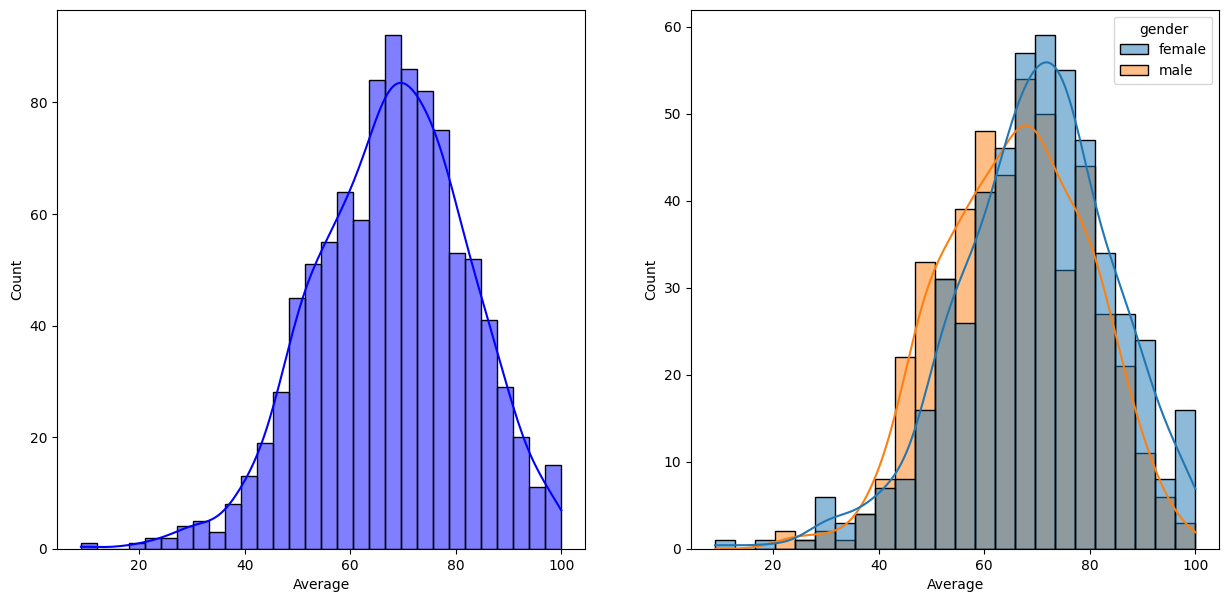

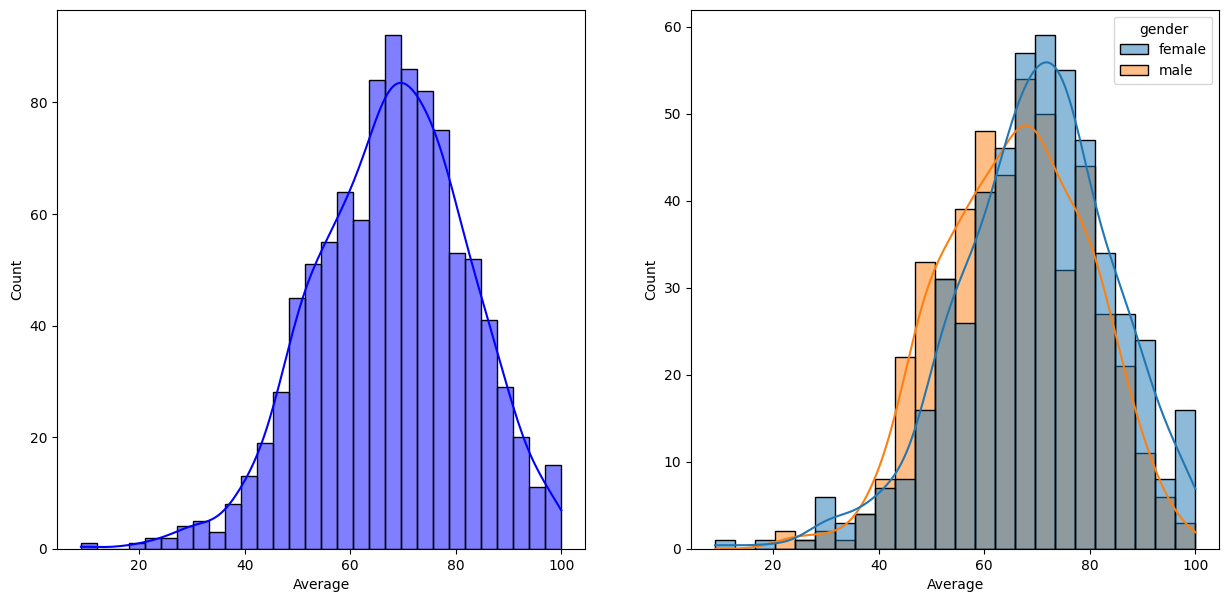

In [63]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='Average',bins=30,kde=True,color='blue')
plt.subplot(122)
sns.histplot(data,x='Average',kde=True,hue='gender')
plt.show()

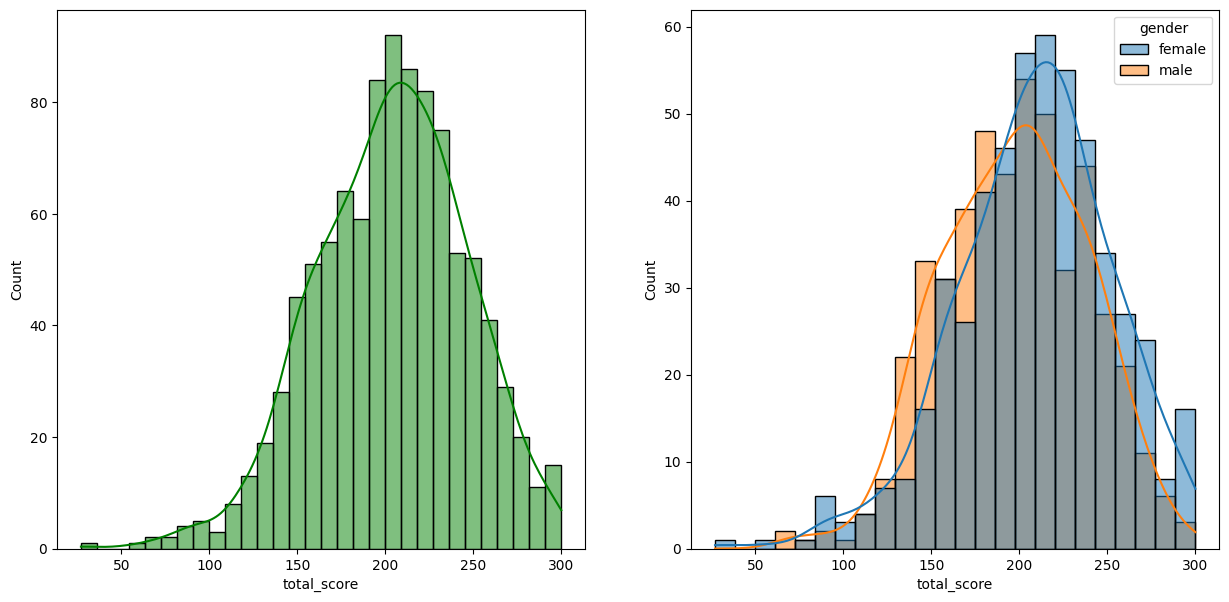

In [64]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=data,x='total_score',bins=30,kde=True,color='green')
plt.subplot(122)
sns.histplot(data=data,x='total_score',kde=True,hue='gender')
plt.show()

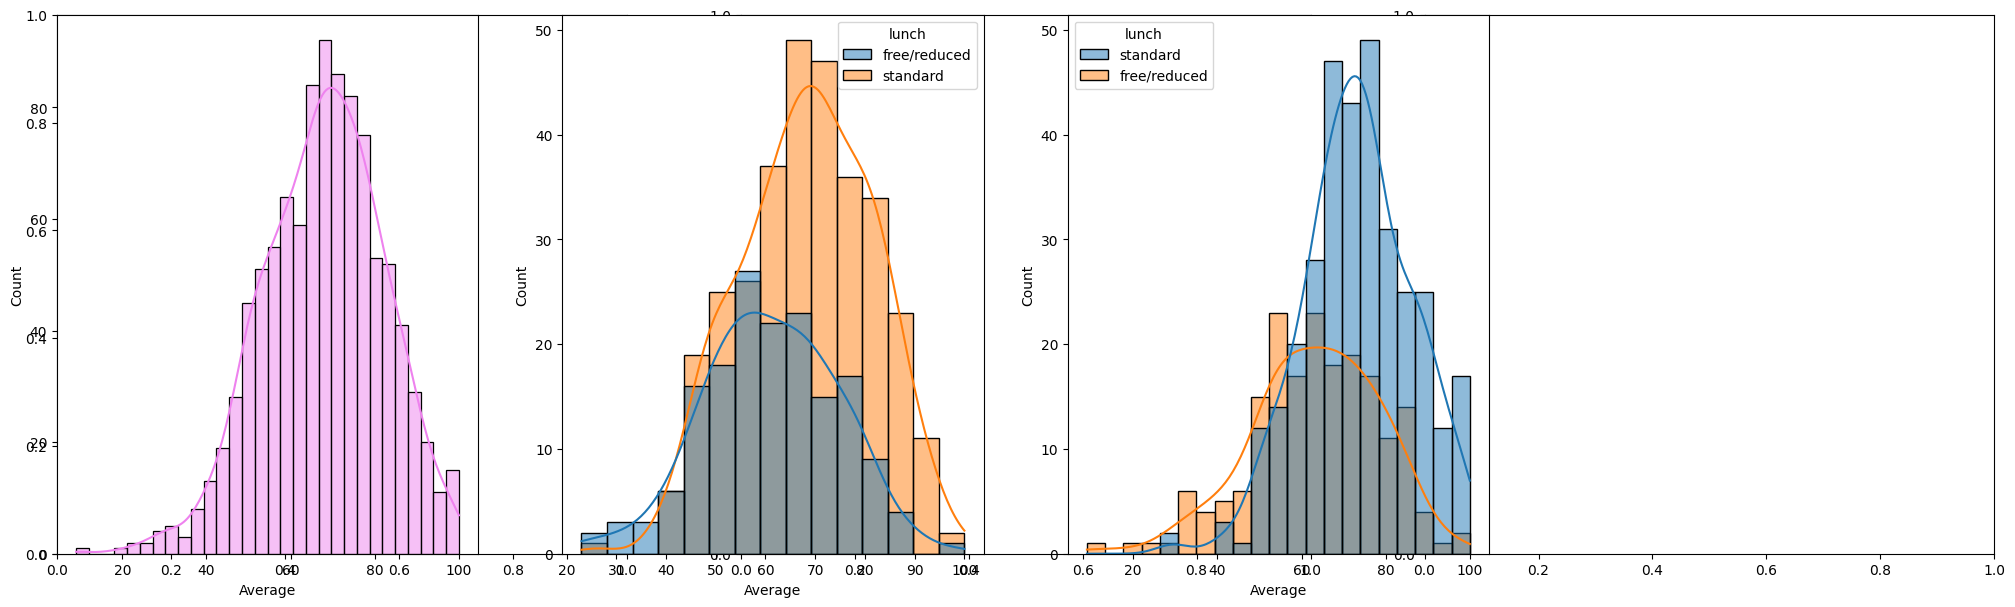

In [65]:
fig, axs=plt.subplots(1,3,figsize=(25,7))
plt.subplot(1,4,1)
sns.histplot(data=data,x='Average',bins=30,kde=True,color='violet')
plt.subplot(1,4,2)
sns.histplot(data=data[data.gender=='male'],x='Average',kde=True,hue='lunch')
plt.subplot(1,4,3)
sns.histplot(data=data[data.gender=='female'],x='Average',kde=True,hue='lunch')
plt.show()

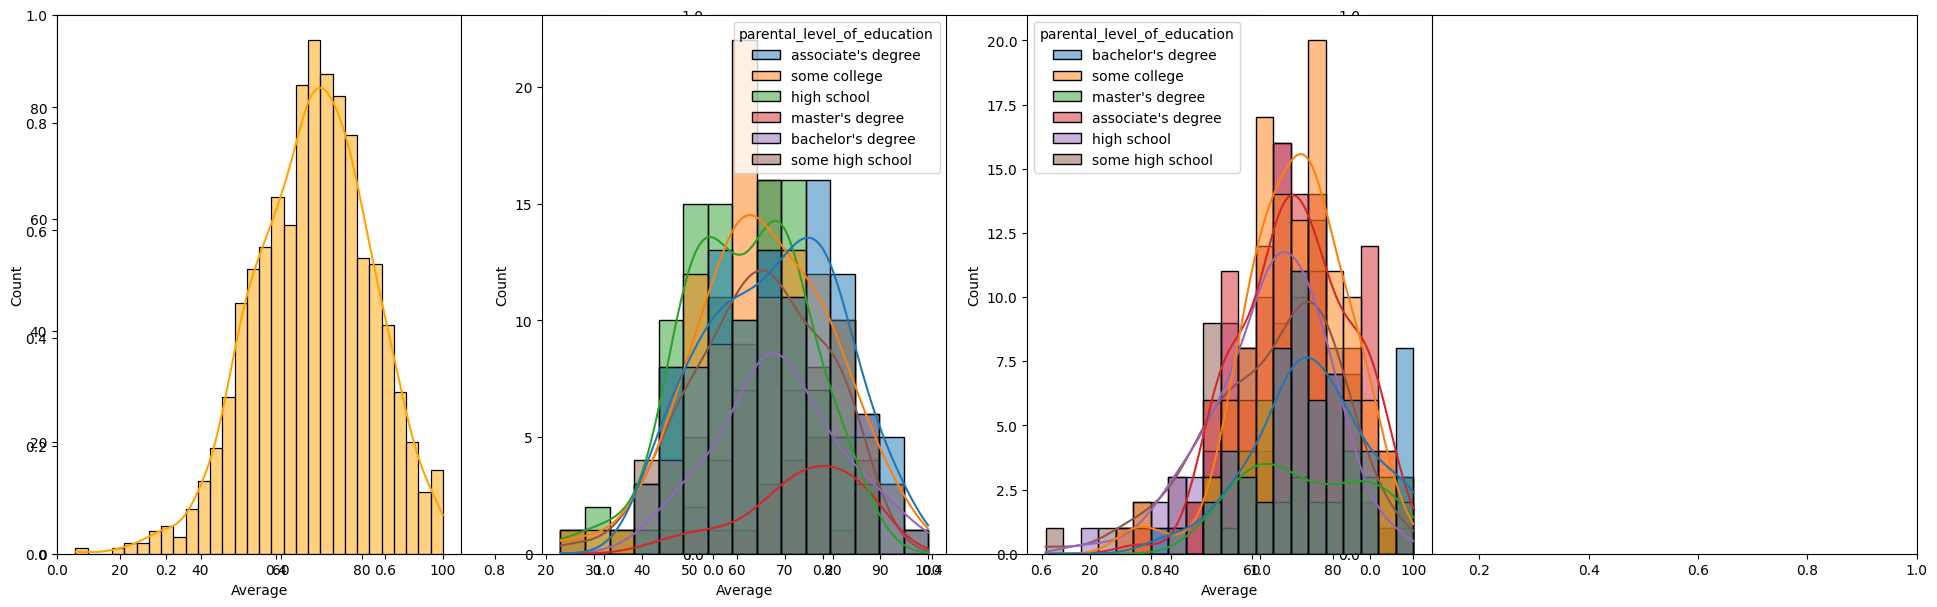

In [66]:
plt.subplots(1,3,figsize=(24,7))
plt.subplot(141)
sns.histplot(data=data,x='Average',bins=30,kde=True,color='orange')
plt.subplot(142)
sns.histplot(data=data[data.gender=='male'],x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=data[data.gender=='female'],x='Average',kde=True,hue='parental_level_of_education')
plt.show()

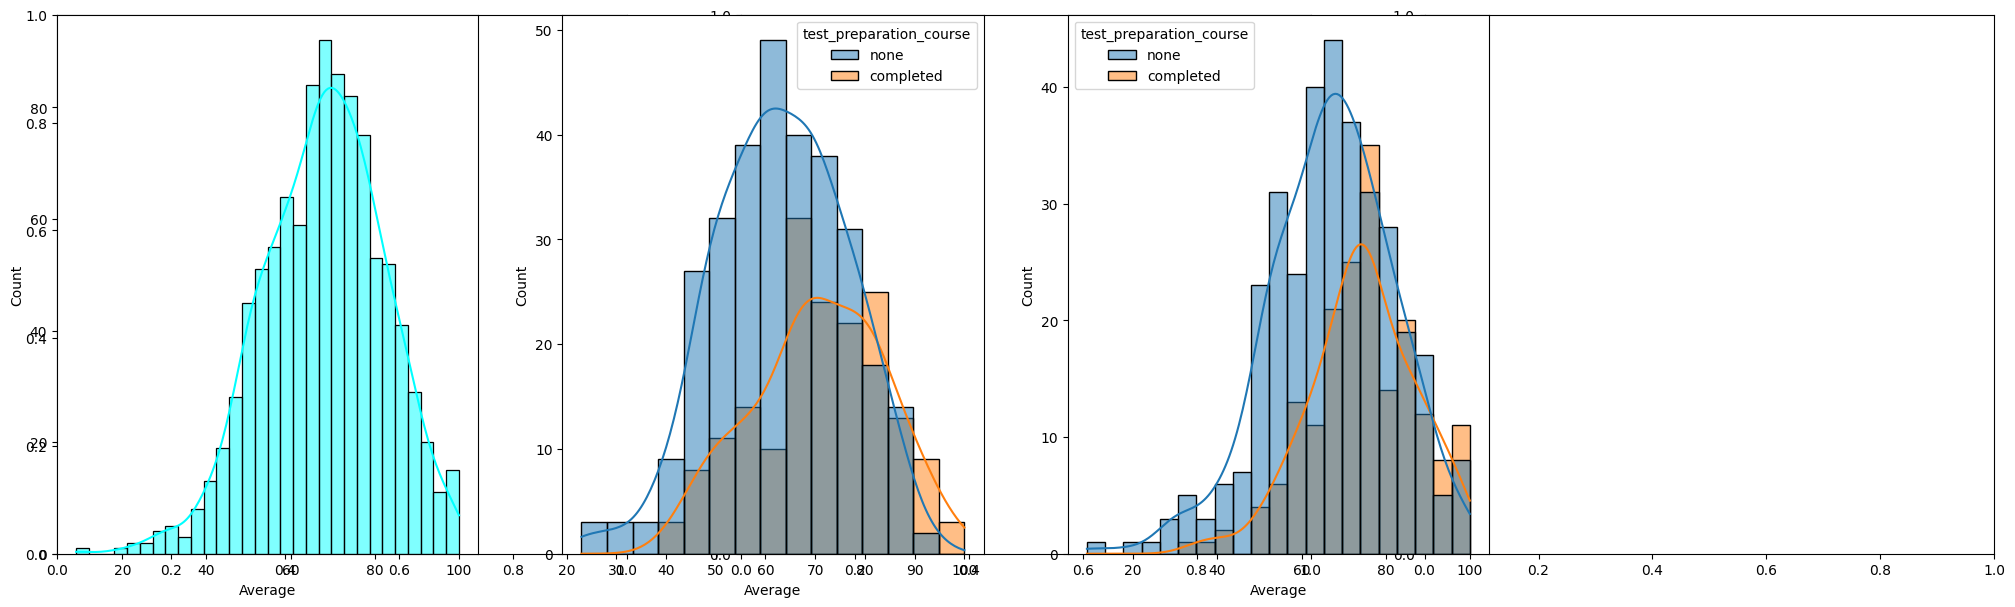

In [67]:
plt.subplots(1,3,figsize=(25,7))
plt.subplot(141)
sns.histplot(data=data,x='Average',bins=30,kde=True,color='cyan')
plt.subplot(142)
sns.histplot(data=data[data.gender=='male'],x='Average',kde=True,hue='test_preparation_course')
plt.subplot(143)
sns.histplot(data=data[data.gender=='female'],x='Average',kde=True,hue='test_preparation_course')
plt.show()

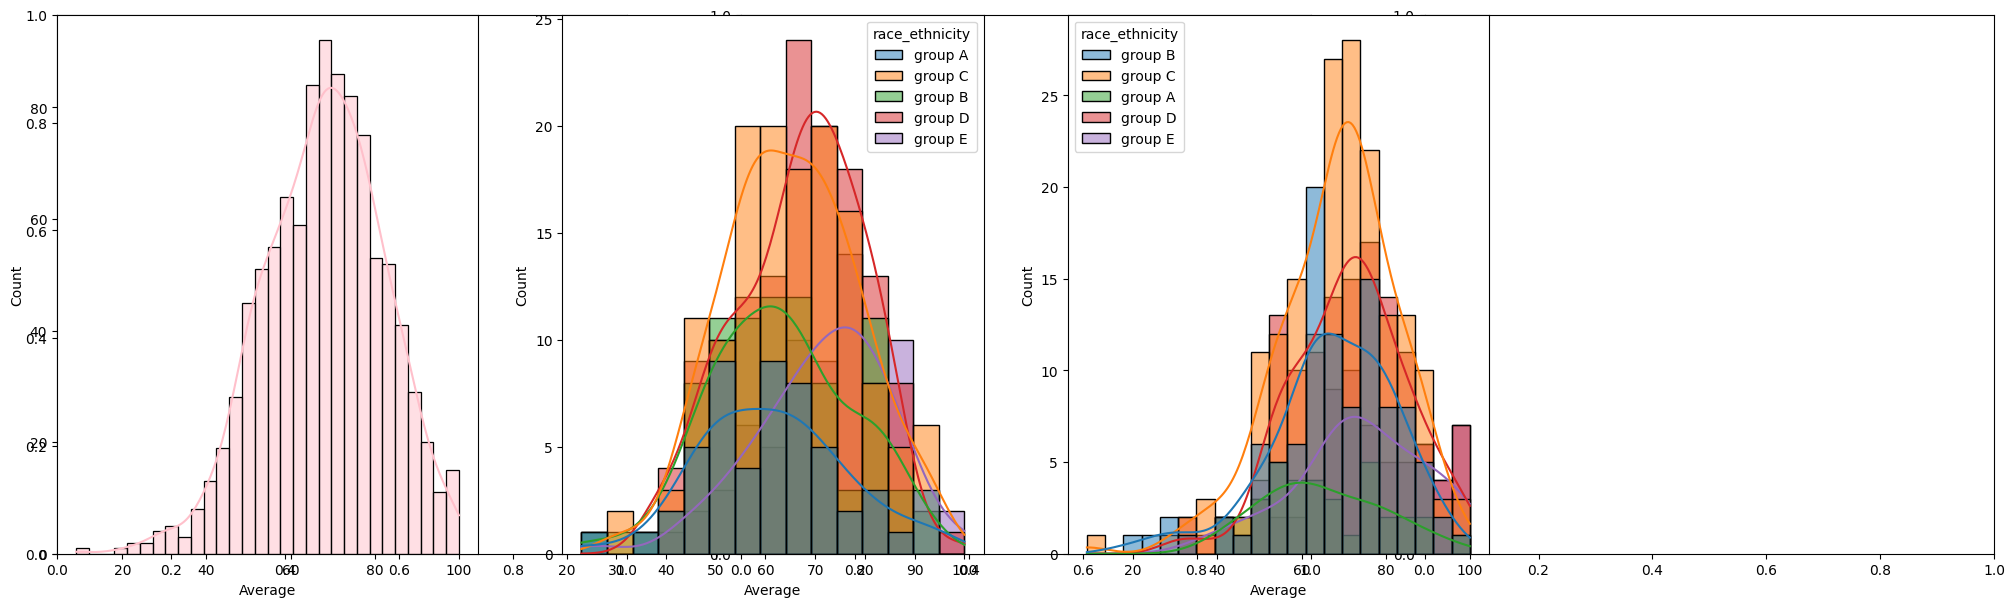

In [68]:
plt.subplots(1,3,figsize=(25,7))
plt.subplot(141)
sns.histplot(data=data,x='Average',bins=30,kde=True,color='pink')
plt.subplot(142)
sns.histplot(data=data[data.gender=='male'],x='Average',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=data[data.gender=='female'],x='Average',kde=True,hue='race_ethnicity')
plt.show()

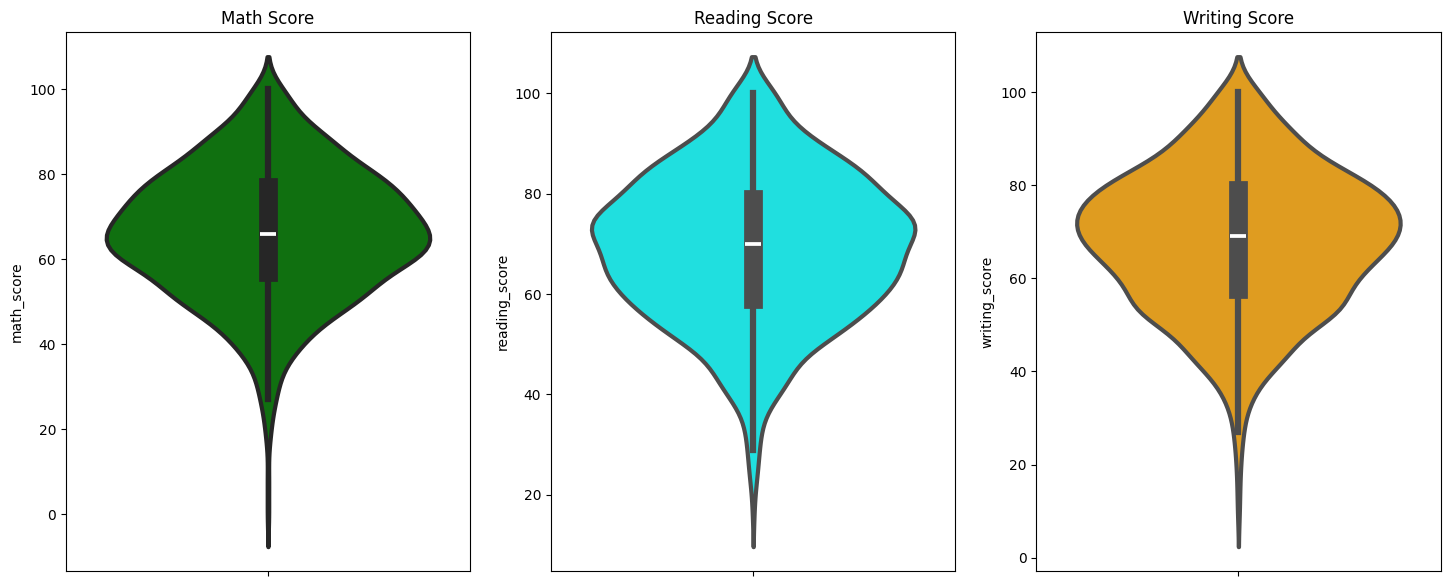

In [69]:
plt.figure(figsize=(24,7))
plt.subplot(141)
plt.title("Math Score")
sns.violinplot(y='math_score',data=data,color='green',linewidth=3)
plt.subplot(142)
plt.title("Reading Score")
sns.violinplot(y='reading_score',data=data,color='cyan',linewidth=3)
plt.subplot(143)
plt.title("Writing Score")
sns.violinplot(y='writing_score',data=data,color='orange',linewidth=3)
plt.show()

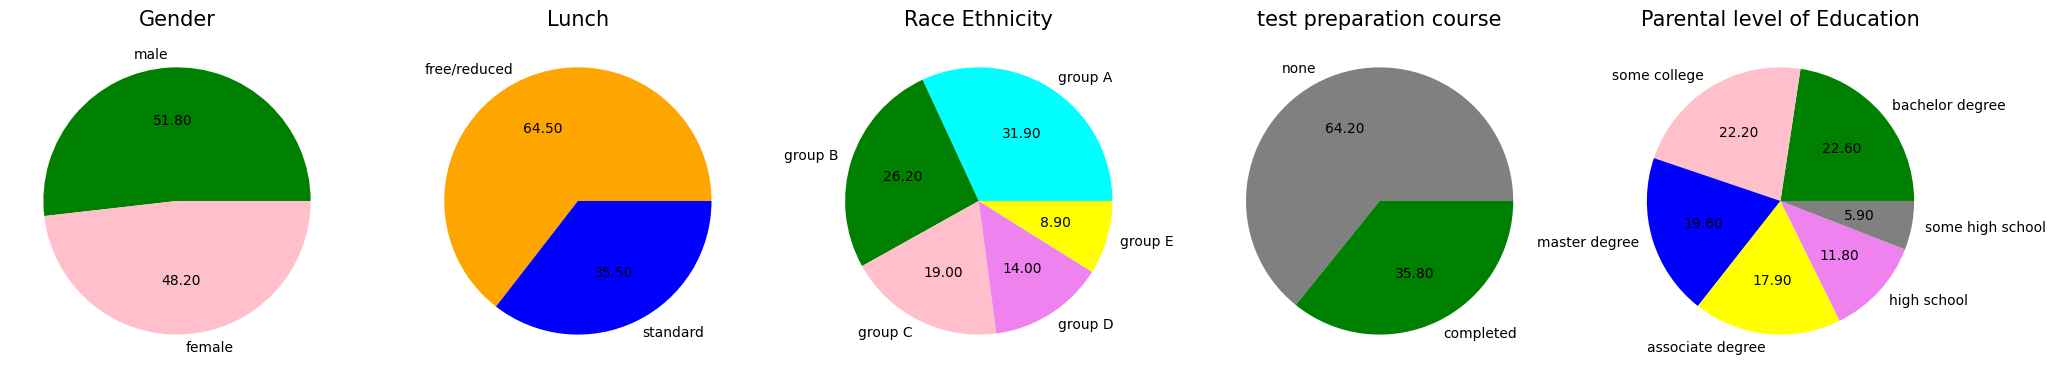

In [70]:
plt.rcParams['figure.figsize']=(25,12)

plt.subplot(151)
size=data['gender'].value_counts()
labels=['male','female']
colors=['green','pink']

plt.pie(size,colors=colors,labels=labels,autopct='%.2f')
plt.title('Gender',fontsize=15)
plt.axis('off')

plt.subplot(152)
size=data['lunch'].value_counts()
labels=['free/reduced','standard']
colors=['orange','blue']

plt.pie(size,colors=colors,labels=labels,autopct='%.2f')
plt.title('Lunch',fontsize=15)
plt.axis('off')

plt.subplot(153)
size=data['race_ethnicity'].value_counts()
labels=['group A','group B','group C','group D','group E']
colors=['cyan','green','pink','violet','yellow']
plt.pie(size,colors=colors,labels=labels,autopct='%.2f')
plt.title('Race Ethnicity',fontsize=15)
plt.axis('off')


plt.subplot(154)
size=data['test_preparation_course'].value_counts()
labels=['none','completed']
colors=['grey','green']
plt.pie(size,colors=colors,labels=labels,autopct='%.2f')
plt.title('test preparation course',fontsize=15)
plt.axis('off')


plt.subplot(155)
size=data['parental_level_of_education'].value_counts()
labels=['bachelor degree','some college','master degree','associate degree','high school','some high school']
colors=['green','pink','blue','yellow','violet','grey']
plt.pie(size,colors=colors,labels=labels,autopct='%.2f')
plt.title('Parental level of Education',fontsize=15)
plt.axis('off')
plt.show()

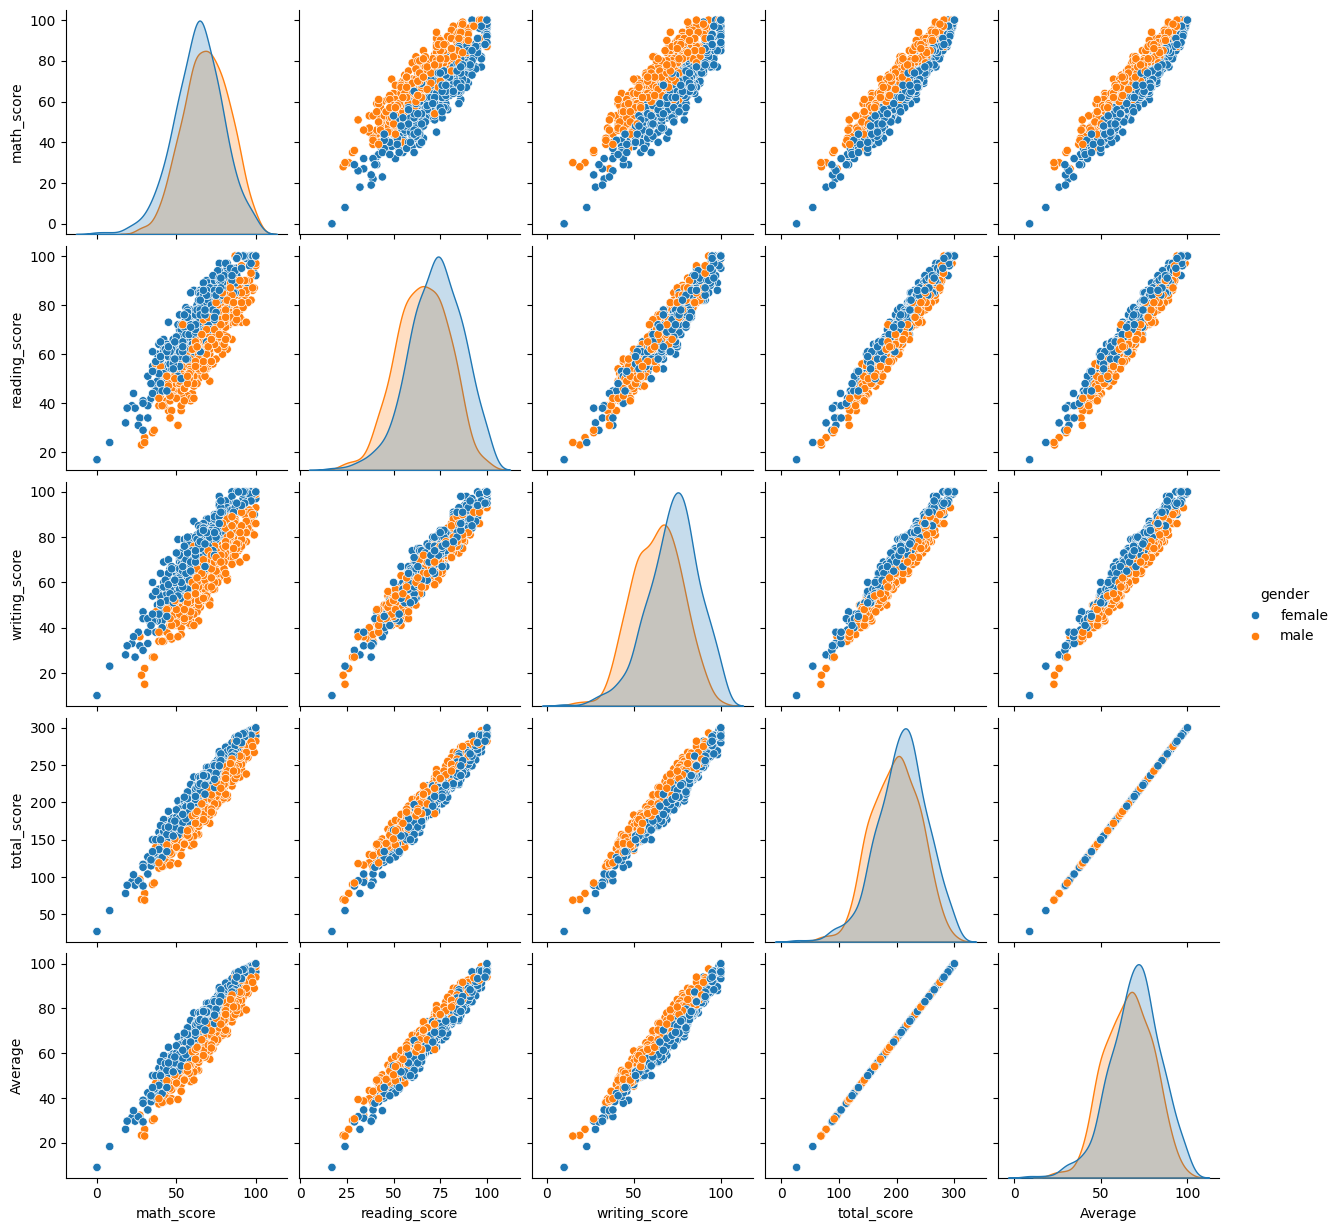

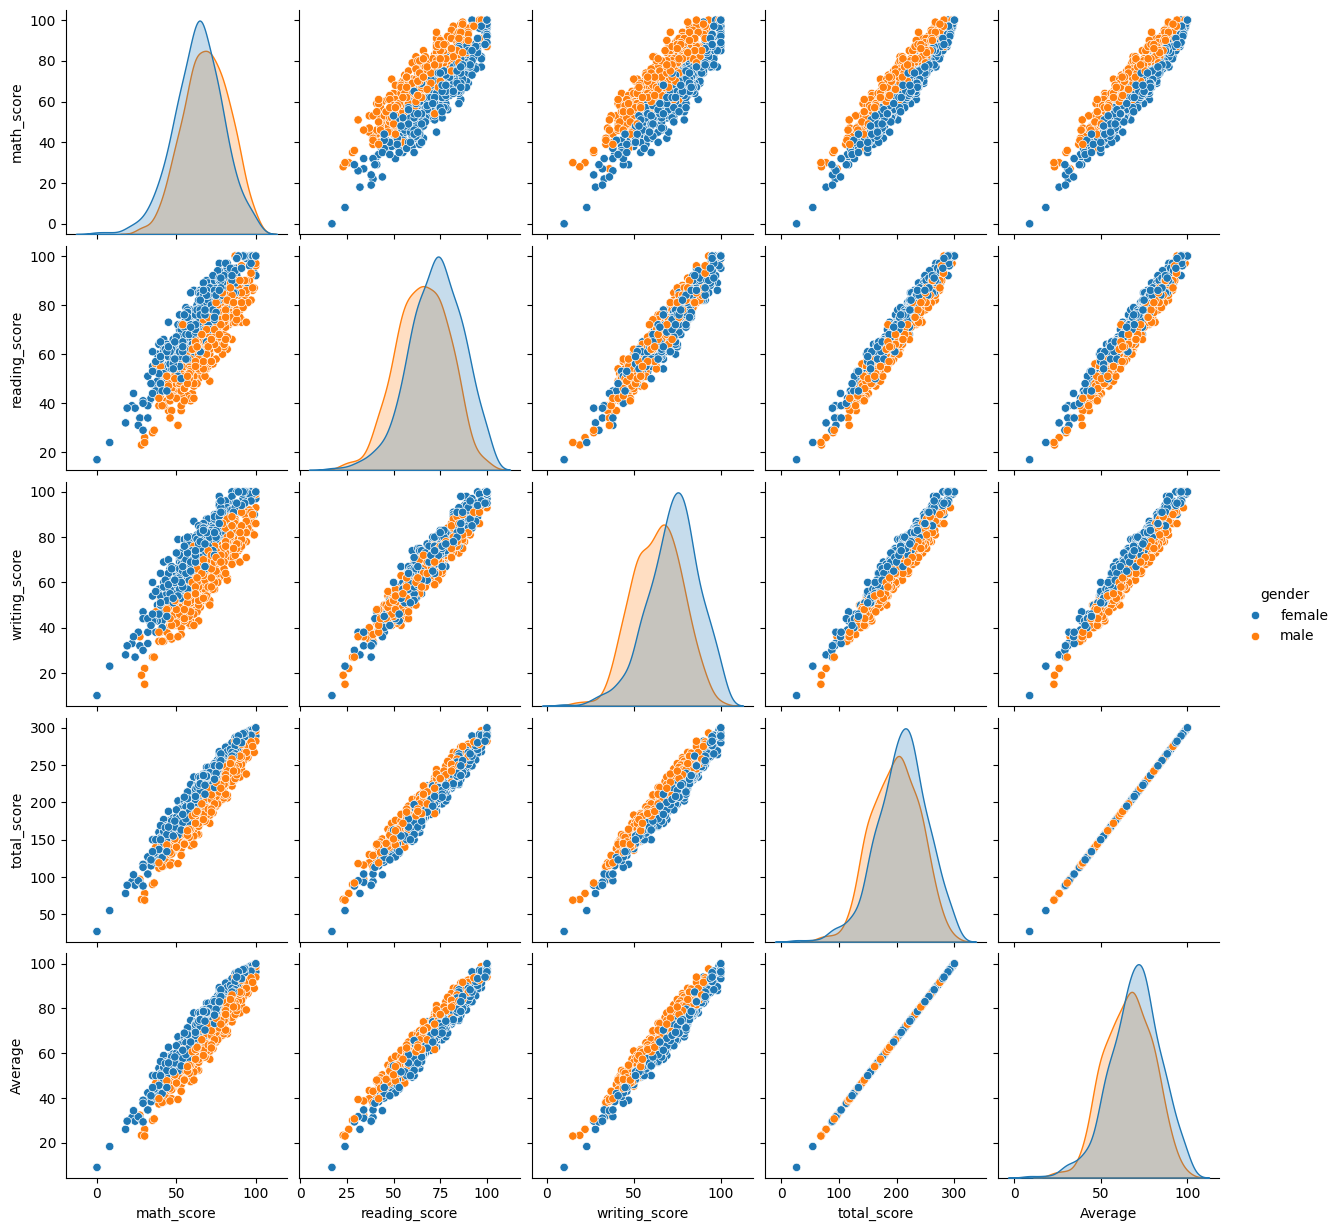

In [72]:
sns.pairplot(data,hue='gender')
plt.show()